# K-NEAREST NEIGHBOURS

## Objective:
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


Dataset:
Need to Classify the animal type


In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Load the dataset
df = pd.read_csv("Zoo.csv")

In [21]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
df.shape

(101, 18)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [24]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.


In [25]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [26]:
df.duplicated().sum()

np.int64(0)

/tmp/ipython-input-2766048506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="viridis")


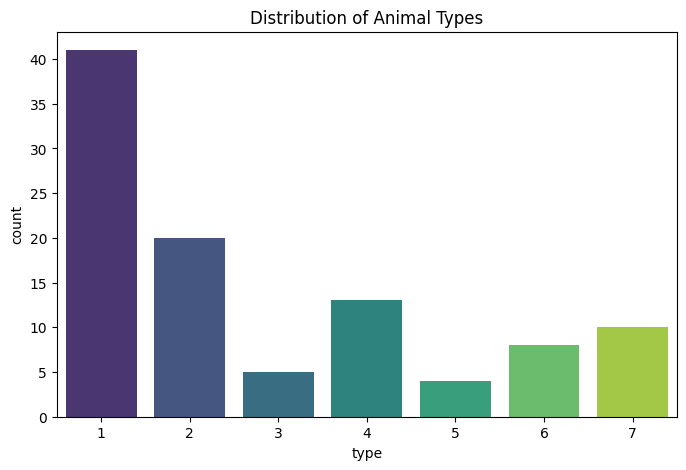

In [27]:
# Count of target variable (animal types)
plt.figure(figsize=(8,5))
sns.countplot(x="type", data=df, palette="viridis")
plt.title("Distribution of Animal Types")
plt.show()

In [28]:
## for heat map we dropping animal name
df1= df.drop('animal name',axis=1)

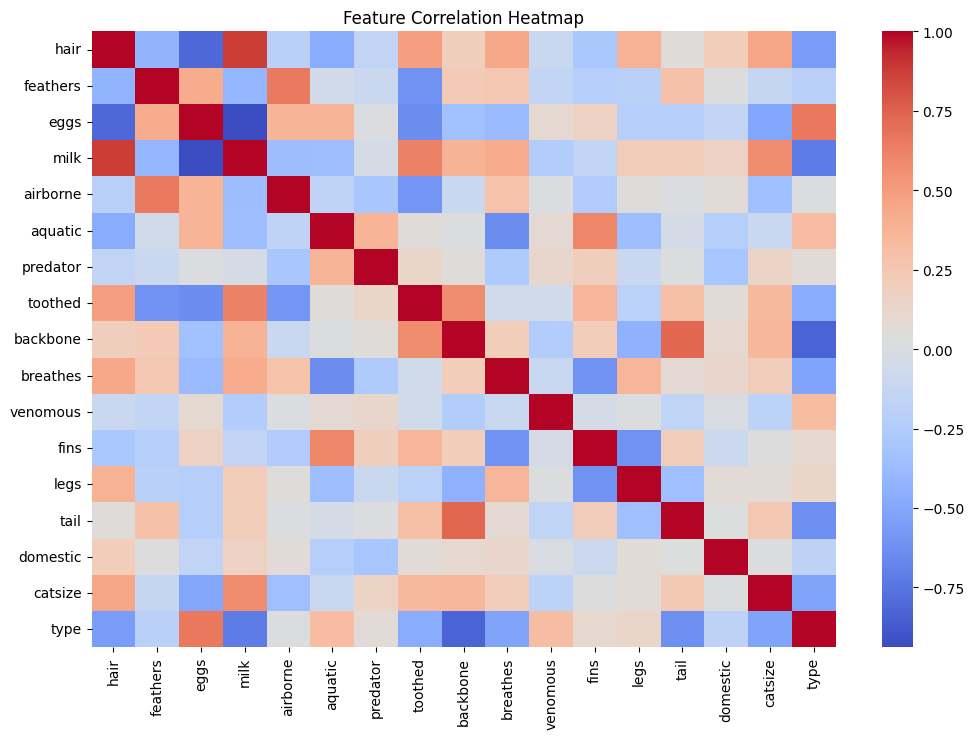

In [30]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
#seperating featuresand target
features = df.drop(['animal name', 'type'], axis=1)
target = df['type']

<Axes: >

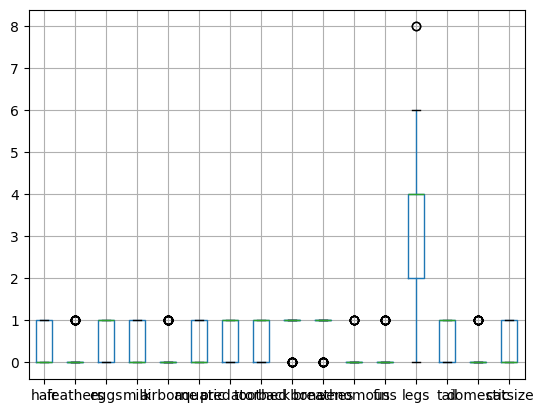

In [32]:
features.boxplot()

In [33]:
##outlier capping
def outlier_capping(df2, col):
    Q1, Q3 = df2[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5  * IQR
    df2[col] = df2[col].clip(lower, upper)   # directly cap values using clip()

for col in features.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(features, col)

<Axes: >

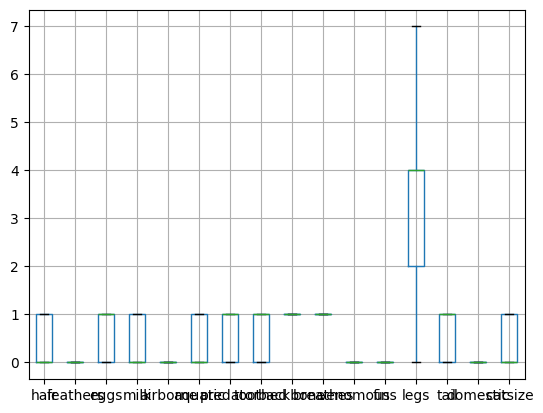

In [34]:
features.boxplot()

In [35]:
scaler = StandardScaler()
feature_sca = scaler.fit_transform(features)

3. Split the dataset into training and testing sets (80% training, 20% testing).

In [36]:
X_train, X_test, y_train, y_test = train_test_split(feature_sca, target, train_size=0.8, random_state=42, stratify=target)

In [37]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80, 16)
Shape of X_test: (21, 16)
Shape of y_train: (80,)
Shape of y_test: (21,)


4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

5. Choose an appropriate distance metric and value for K.

In [47]:
''' we choosing minkowski because it Works well when features are continuous and scaled. It is flexible, it includes the others as special cases.
By setting p=2, we get Euclidean distance,
which is the most natural way to measure similarity in feature space for mixed datasets like Zoo.'''

' we choosing minkowski because it Works well when features are continuous and scaled. It is flexible, it includes the others as special cases.\nBy setting p=2, we get Euclidean distance,\nwhich is the most natural way to measure similarity in feature space for mixed datasets like Zoo.'

In [38]:
#Implement KNN
# Try with k=5 and distance metric = 'minkowski' (Euclidean when p=2)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
# Predictions
y_pred = knn.predict(X_test)
y_pred

array([7, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 4, 6, 1, 1, 2])

In [41]:
#Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [42]:
#precision, recall, F1 score, support
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2

    accuracy                           0.90        21
   macro avg       0.63      0.71      0.67        21
weighted avg       0.84      0.90      0.87        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
#we got 90 % accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9047619047619048


In [45]:
#how many classes we have as type
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

7. Visualize the decision boundaries of the classifier.

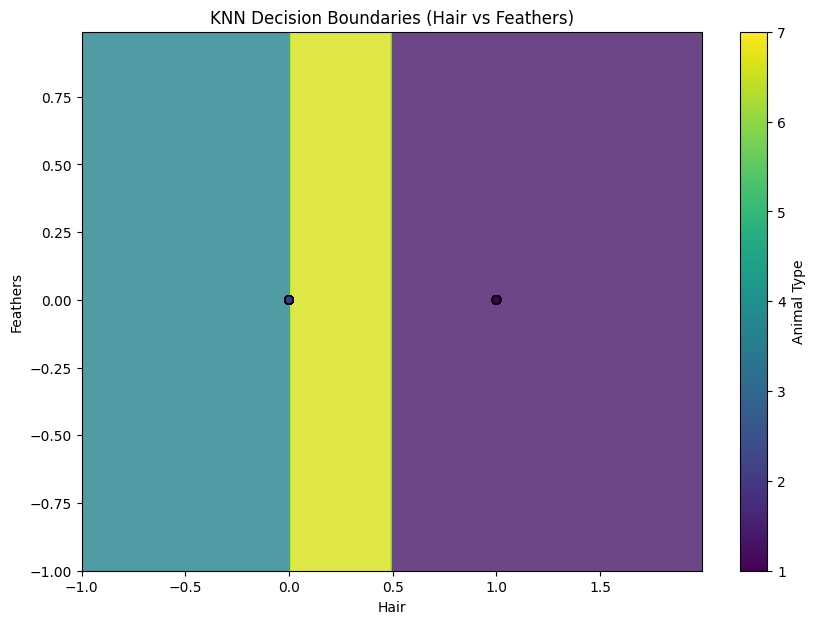

In [44]:
# Visualize decision boundaries (for 2 features for simplicity)
# Due to the high dimensionality(lot of features), we'll select two features for visualization.
#'hair' and 'feathers'
X_vis = features[['hair', 'feathers']].values
y_vis = target.values

# Create a meshgrid
''' meshgrid (xx, yy) that covers the range of values for 'hair' and 'feathers'.
 This grid will be used to plot the decision boundaries.'''
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Train a KNN classifier on the selected features
knn_vis = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_vis.fit(X_vis, y_vis)

# Predict the class for each point in the meshgrid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel is used to flatten a multi-dimensional array into a one-dimensional (1D) array.
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))  ## plt.contourf, filling the regions based on the predicted class for each point in the meshgrid.
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)

# Plot the actual data points
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=plt.cm.viridis)
plt.xlabel('Hair')
plt.ylabel('Feathers')
plt.title('KNN Decision Boundaries (Hair vs Feathers)')
plt.colorbar(scatter, label='Animal Type')
plt.show()

In [46]:
'''Decision boundary:

A decision boundary is an imaginary line (or surface in higher dimensions) that separates different classes in a classification problem.
It’s the line/region where the classifier is uncertain — i.e., where the predicted probability of two (or more) classes is equal.

On one side of the boundary → points are classified into Class A.

On the other side → points are classified into Class B.

Example: we classify animals by [hair, feathers]:

Left side of the boundary = mammals (hair=1).

Right side of the boundary = birds (feathers=1).

A decision boundary is a map of how your model decides between different classes.
It’s useful because it gives us insight into the model’s decision-making process,
helps us detect overfitting/underfitting, and makes results more interpretable. '''

'Decision boundary:\n\nA decision boundary is an imaginary line (or surface in higher dimensions) that separates different classes in a classification problem.\n\nIt’s the line/region where the classifier is uncertain — i.e., where the predicted probability of two (or more) classes is equal.\n\nOn one side of the boundary → points are classified into Class A.\n\nOn the other side → points are classified into Class B.\n\nExample: If we classify animals by [hair, feathers]:\n\nLeft side of the boundary = mammals (hair=1).\n\nRight side of the boundary = birds (feathers=1).\n\nA decision boundary is a map of how your model decides between different classes.\nIt’s useful because it gives us insight into the model’s decision-making process, \nhelps us detect overfitting/underfitting, and makes results more interpretable. '

Interview Questions:
1. What are the key hyperparameters in KNN?

In [ ]:
''' The number of neighbors (k) and the distance metric used to calculate similarity
'k' value determines the number of data points considered for a prediction,
 while the distance metric specifies how to measure the "closeness" between points, such as Euclidean or Manhattan distance
 Minkowski Distance: A generalization that can be set to Euclidean (p=2) or Manhattan (p=1) by adjusting a parameter 'p'. '''

2. What distance metrics can be used in KNN?

In [48]:
'''Euclidean distance (straight-line distance), Manhattan distance (grid-like, absolute differences),
 Minkowski distance (a generalization of the two).
 Other metrics like Hamming distance are used for non-numeric data such as strings or Boolean vectors,
 while metrics like Cosine distance and Jaccard distance can be applied to specific types of data like categorical data or for analyzing
  similarities in large, sparse datasets'''

'Common distance metrics for K-Nearest Neighbors (KNN) include Euclidean distance (straight-line distance), \nManhattan distance (grid-like, absolute differences), and Minkowski distance (a generalization of the two).\n Other metrics like Hamming distance are used for non-numeric data such as strings or Boolean vectors, \n while metrics like Cosine distance and Jaccard distance can be applied to specific types of data like categorical data or for analyzing\n  similarities in large, sparse datasets'